In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [6]:
df = pd.read_csv("combined_marine_dataset_3sites.csv")
df.head()

,STATION_ID,MMP_SITE_NAME,LONGITUDE,LATITUDE,LOGGER_SERIAL,SAMPLE_DAY,CHL_QA_AVG,NTU_QA_AVG
0,BUR13,Burdekin River mouth mooring,147.5822,-19.5875,1958,2015-03-22,1.910,3.901
1,BUR13,Burdekin River mouth mooring,147.5822,-19.5875,1958,2015-03-23,1.935,3.958
2,BUR13,Burdekin River mouth mooring,147.5822,-19.5875,1958,2015-03-24,1.867,2.408
3,BUR13,Burdekin River mouth mooring,147.5822,-19.5875,1958,2015-03-25,2.166,1.352
4,BUR13,Burdekin River mouth mooring,147.5822,-19.5875,1958,2015-03-26,1.911,1.058


In [7]:
print(df.dtypes)

STATION_ID        object
MMP_SITE_NAME     object
LONGITUDE        float64
LATITUDE         float64
LOGGER_SERIAL      int64
SAMPLE_DAY        object
CHL_QA_AVG       float64
NTU_QA_AVG       float64
dtype: object


In [8]:
#Converting to DateTime
df["SAMPLE_DAY"] = pd.to_datetime(df["SAMPLE_DAY"])

In [9]:
print(df.dtypes)

STATION_ID               object
MMP_SITE_NAME            object
LONGITUDE               float64
LATITUDE                float64
LOGGER_SERIAL             int64
SAMPLE_DAY       datetime64[ns]
CHL_QA_AVG              float64
NTU_QA_AVG              float64
dtype: object


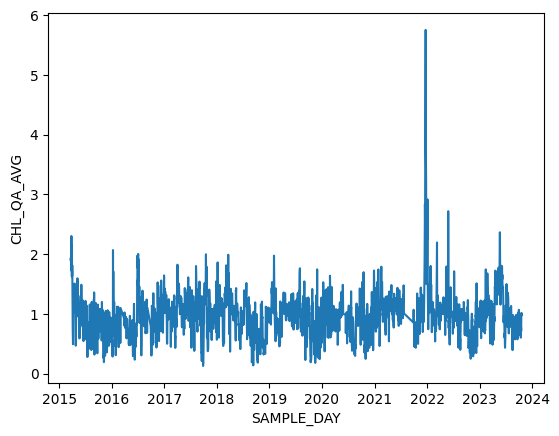

In [39]:
# Plotting a time series
plt.figure()

df_bur13 = df[df['STATION_ID'] == 'BUR13']
df_bur13.set_index('SAMPLE_DAY', inplace=True)
# chlorophyll concentration plot
ax_bur13_chl = sns.lineplot(data=df_bur13, x=df_bur13.index, y='CHL_QA_AVG')

plt.show()

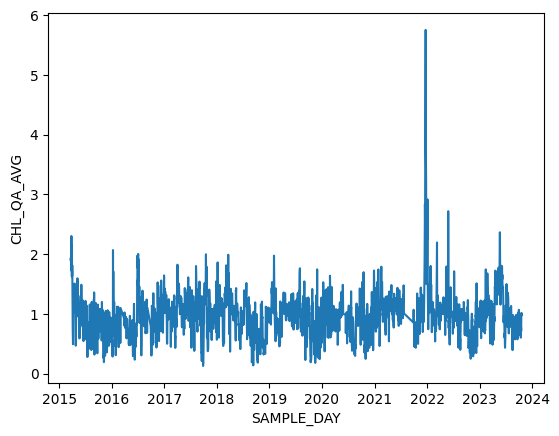

In [38]:
# Plotting a time series
plt.figure()

df_bur13 = df[df['STATION_ID'] == 'BUR13']
df_bur13.set_index('SAMPLE_DAY', inplace=True)
# chlorophyll concentration plot
ax_bur13_chl = sns.lineplot(data=df_bur13, x=df_bur13.index, y='CHL_QA_AVG')

plt.show()

Plotting the original chlorophyll data and a 30-day moving average to analyze long-term trends and reduce short-term fluctuations.

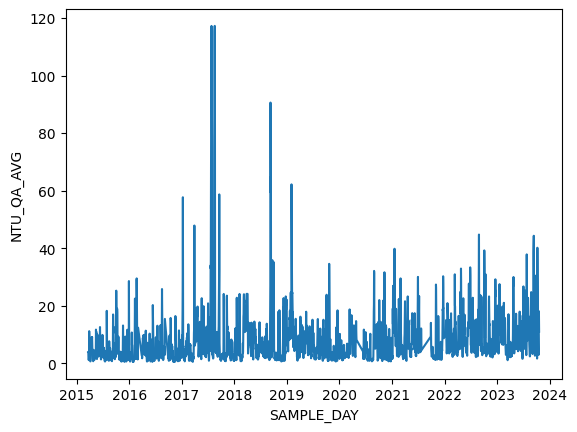

In [40]:
plt.figure()
ax_bur13_ntu = sns.lineplot(data=df_bur13, x=df_bur13.index, y='NTU_QA_AVG')

plt.show()

Calculating the percent change in turbidity measurements for the Burdekin River to identify the largest fluctuation in sediment levels.

In [41]:
#  percent change in turbidity
chl_pct_change = df_bur13["NTU_QA_AVG"].pct_change(fill_method=None) * 100
max_pct_change_value = chl_pct_change.abs().max()

# index (date) where the maximum (absolute) percent change occurs
max_pct_change_date = chl_pct_change[chl_pct_change == max_pct_change_value].index

In [42]:
print("The maximum percent change value happened on",max_pct_change_date[0],
      "with a value of", round(max_pct_change_value,2), "%")

The maximum percent change value happened on 2019-12-18 00:00:00 with a value of 1430.64 %


Creating a pivot table to calculate the average chlorophyll concentration per month for each station and visualizing it with a line plot.

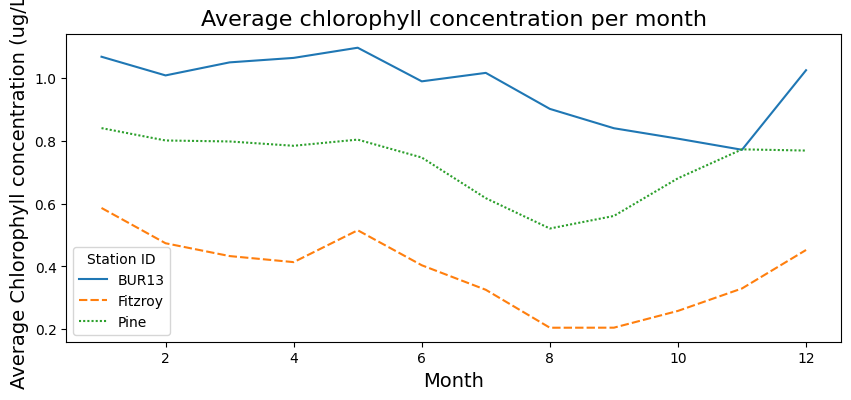

In [20]:
plt.figure(figsize=(10, 4))

df["MONTH"] = df["SAMPLE_DAY"].dt.month
# pivot table
pivoted_df = df.pivot_table(index="MONTH",
                            columns="STATION_ID",
                            values="CHL_QA_AVG",
                            aggfunc="mean")


# line plot
ax_monthly_chl = sns.lineplot(data=pivoted_df)

plt.xlabel("Month", fontsize=14)
plt.ylabel("Average Chlorophyll concentration (ug/L)", fontsize=14)
plt.legend(title="Station ID")

plt.xticks(rotation=0, fontsize=10)
plt.title("Average chlorophyll concentration per month", fontsize=16)

plt.show()

Performing simple linear regression to model chlorophyll concentration based on the day number (idx) to understand the trend over time.

In [44]:
# dataframe with the chlorophyll data for the BUR13 station
df_bur13_chl = df_bur13[["CHL_QA_AVG"]].copy()  # Use .copy() to avoid the SettingWithCopyWarning

# Add 'idx' 
df_bur13_chl.loc[:, "idx"] = range(len(df_bur13_chl))  # Use .loc to modify the DataFrame safely

predictors_simple = ["idx"]
X_simple = sm.add_constant(df_bur13_chl[predictors_simple])
Y = df_bur13_chl["CHL_QA_AVG"]

model_simple = sm.OLS(Y, X_simple)

results_simple = model_simple.fit()


In [45]:
print(results_simple.summary())

                            OLS Regression Results                            
Dep. Variable:             CHL_QA_AVG   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     31.48
Date:                Sat, 10 May 2025   Prob (F-statistic):           2.20e-08
Time:                        17:46:00   Log-Likelihood:                -1247.6
No. Observations:                3009   AIC:                             2499.
Df Residuals:                    3007   BIC:                             2511.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9075      0.013     67.949      0.0

C:\Users\91913\AppData\Local\Temp\ipykernel_3116\1985945624.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a = params[1]
C:\Users\91913\AppData\Local\Temp\ipykernel_3116\1985945624.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b = params[0]


Text(0.5, 1.0, 'Scatter plot of Chlorophyll concentration with prediction line')

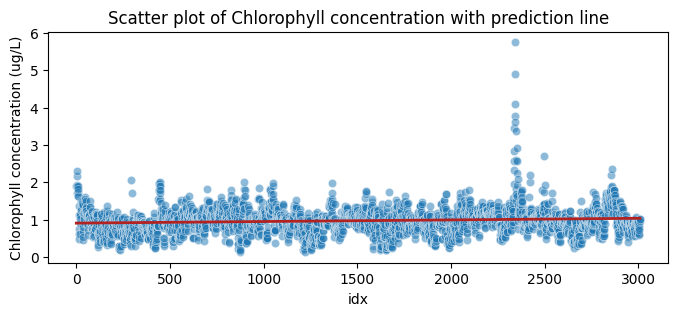

In [46]:
params = results_simple.params

a = params[1]
b = params[0]

# prediction line
line = a * df_bur13_chl["idx"] + b

plt.figure(figsize=(8,3))
sns.scatterplot(x=df_bur13_chl["idx"], y=df_bur13_chl["CHL_QA_AVG"], alpha=0.5)

# adding prediction line
sns.lineplot(x=df_bur13_chl["idx"], y=line, color="firebrick", linewidth=2)

plt.ylabel("Chlorophyll concentration (ug/L)")
plt.title("Scatter plot of Chlorophyll concentration with prediction line")

Creating a multiple linear regression model to predict chlorophyll concentration using both the day number (idx) and the month (MONTH) as predictors.

In [48]:
# add a MONTH column to the df_bur13_chl DataFrame
df_bur13_chl["MONTH"] = df_bur13_chl.index.month

predictors_multi = ["idx", "MONTH"]

X_multi = sm.add_constant(df_bur13_chl[predictors_multi])
Y = df_bur13_chl["CHL_QA_AVG"]
model_multi = sm.OLS(Y, X_multi)

results_multi = model_multi.fit()

print(results_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             CHL_QA_AVG   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     76.40
Date:                Sat, 10 May 2025   Prob (F-statistic):           4.33e-33
Time:                        17:47:34   Log-Likelihood:                -1188.7
No. Observations:                3009   AIC:                             2383.
Df Residuals:                    3006   BIC:                             2401.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0459      0.018     57.479      0.0

Calculating the predicted values, residuals, and Mean Absolute Error (MAE) to assess the regression model's accuracy.

In [49]:
y_pred = results_multi.predict(X_multi)

# residuals (actual - predicted)
residuals = Y - y_pred
MAE = residuals.abs().mean()

# rounded to 4 decimal places
print("MAE:", round(MAE, 4))


MAE: 0.2497


Creating a regression plot for the actual vs. predicted values as another method.

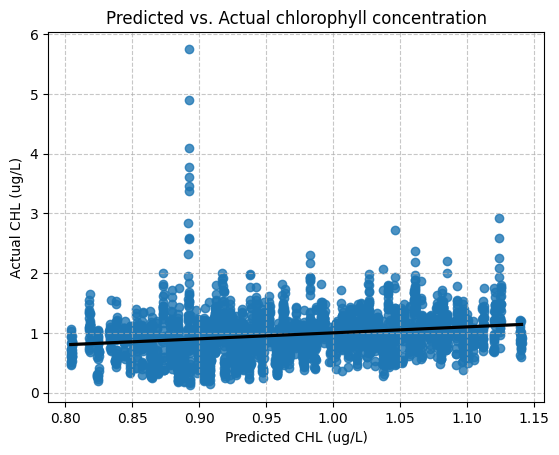

In [50]:
# regression plot
regplot = sns.regplot(x=y_pred, y=Y, line_kws={'color': 'black'})


plt.xlabel("Predicted CHL (ug/L)")
plt.ylabel("Actual CHL (ug/L)")
plt.title("Predicted vs. Actual chlorophyll concentration")

plt.grid(alpha=0.7, linestyle="--")

plt.show()